<a href="https://colab.research.google.com/github/Kiko-exe/Environmental-physics/blob/main/Copy_of_2024_Exercise_5_(Week_8)_Elementary_Flows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Elementary flows

For steady, invicid, incompressible flow, it can be shown that several elementary flows can be defined in terms of the velocity potential, $\phi$. For these type of potential flow, the stream function $\psi$ is orthogonal and equally useful for defining the flow. One advantage of this framework is that solutions are linear, so that elementary flows can be added together to get more complex cases.

From lectures, here are three important elementary flows:

**a. Uniform flow**: constant velocity at some particular angle.

$$
    u = U_0 \cos(\alpha)
$$

$$
    v = U_0 \sin(\alpha)
$$


**b. Point source**: One can imagine a manhole cover as a concept for a point source. We define the mass flux as $Q$, which must be constant outward along a radial line. In polar coordinates, $u_\theta = 0$, and

$$
u_r = \frac{Q}{2 \pi} \frac{1}{r}
$$


**c. Free vortex**: While vorticity is a measure of local rotation, it describes both curvature and shear. If these two cancel one can have a free vortex describing circular motion with circulation $\Gamma$. The radial velocity is $u_r=0$, and the azimuthal velocity is

$$
u_\theta = \frac{\Gamma}{2 \pi} \frac{1}{r}
$$


In each of these cases, one can express the stream function and velocity potential via the normal gradient relationships in either polar or Cartesian coordinates. Here, we wish to show graphs on an $x$-$y$ plane, and so Cartesian coordinates are preferred.


## Task

1. Plot examples of each type of flow (a, b, c above). Include velocity vectors and contours for the stream function and velocity potential.

Try combinations.
2. Freestream plus a source.
3. Freestream plus a vortex.
4. Source near a sink (negative source).
5. A source near another source.
6. A vortex near another vortex.
7. A vortex near another vortex of opposite sign.

(1a-c and 4 are given as worked examples)

In [ ]:
## from matplotlib import rc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


print("Imported all the modules")

Imported all the modules


##1a. Uniform flow ("freestream")

In [ ]:
# Freestream velocities (constant!)
def vel_freestream(xx,yy,U0,alpha):
    u = U0*np.cos(alpha)*np.ones_like(xx)
    v = U0*np.sin(alpha)*np.ones_like(xx)
    return u, v

# Get the velocity potential of the freestream: linear slope
def phi_freestream(xx,yy,U0,alpha):
    u,v = vel_freestream(xx,yy,U0,alpha)
    phi = u*xx + v*yy
    return phi

# Get the streamfunction of the freestream
def psi_freestream(xx,yy,U0,alpha):
    u,v = vel_freestream(xx,yy,U0,alpha)
    psi = u*yy - v*xx
    return psi


# Making a Plot

Here we set up a simple domain with $x$ and $y$ coordinates, then plot a variety of functions. There is no need to include all functions for every plot; in fact, try to choose which plots seem sensible in each case.

We can try out two functions for plotting the velocity field:

plt.streamplot https://www.geeksforgeeks.org/matplotlib-pyplot-streamplot-in-python/

plt.quiver https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/

... and another one for contour plots:

plt.contour https://www.geeksforgeeks.org/matplotlib-pyplot-contourf-in-python/

In [ ]:
# Set up a "grid for plotting"
xmin = 0.
xmax = 5.
ymin = 0.
ymax = 5.
nx = 50
ny = 50
x = np.linspace(xmin, xmax, nx)
y = np.linspace(xmin, xmax, nx)
xx, yy = np.meshgrid(x,y)

size=8

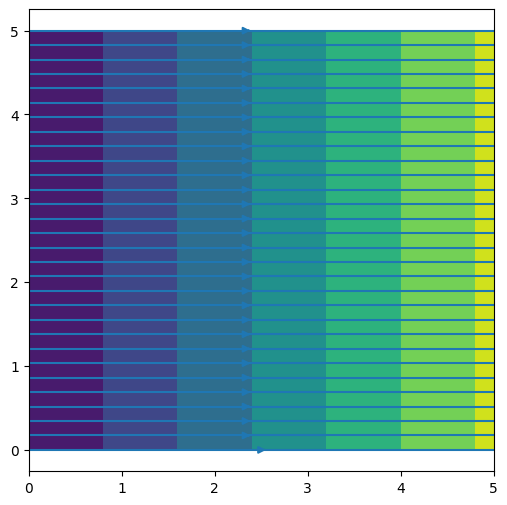

In [ ]:
# Plot a freestream case
fig = plt.figure(figsize=(6,6))
U0 = 1.
alpha = 0 * np.pi/180 #angle of the flow to the horizontal, set to zero here

# Use functions defined above to calculate variables in suitable format for plotting
ufree,vfree = vel_freestream(xx,yy,U0,alpha)
phi_free = phi_freestream(xx,yy,U0,alpha)
psi_free = psi_freestream(xx,yy,U0,alpha)

# To plot velocity vectors, we can use plt.streamplot: https://www.geeksforgeeks.org/matplotlib-pyplot-streamplot-in-python/
p = plt.streamplot(xx,yy,ufree,vfree)
# A good alternative is plt.quiver: https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/
# p = plt.quiver(xx,yy,ufree,vfree)

#For contour plots, try plt.contourf: https://www.geeksforgeeks.org/matplotlib-pyplot-contourf-in-python/
#Only plot one at a time!
p = plt.contourf(xx,yy,phi_free) #contours of the velocity potential
#p = plt.contourf(xx,yy,psi_free) #contours of the streamfunction


#1b. Point source

In [ ]:
# Velocity field for point source
def vel_source(xx,yy,Q0,xloc,yloc):
    x2y2 = (xx - xloc)**2 + (yy - yloc)**2
    u = Q0 / (2 * np.pi)*(xx - xloc) / x2y2
    v = Q0 / (2 * np.pi)*(yy - yloc) / x2y2
    return u,v

# Potential for point source
def phi_source(xx,yy,Q0,xloc,yloc):
    phi = Q0 / (2*np.pi) * np.log((xx-xloc)**2 + (yy - yloc)**2)
    return phi

# Stream function for point source
def psi_source(xx,yy,Q0,xloc,yloc):
    psi = Q0 / (2*np.pi)*np.arctan2((yy - yloc), (xx - xloc))
    return psi

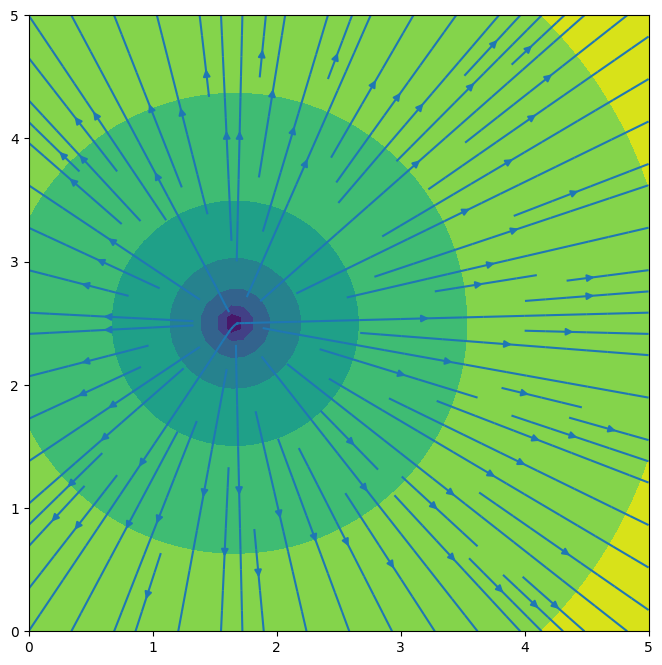

In [ ]:
# Plot a point source
fig = plt.figure(figsize=(size,size))

Q0 = 1.0
xloc = xmax/3
yloc = ymax/2

# Use functions defined above to calculate variables in suitable format for plotting
usrc,vsrc = vel_source(xx,yy,Q0,xloc,yloc)
phi_sourceplot = phi_source(xx,yy,Q0,xloc,yloc)
psi_sourceplot = psi_source(xx,yy,Q0,xloc,yloc)

# Plot velocity vectors
p = plt.streamplot(xx,yy,usrc,vsrc)
#p = plt.quiver(xx,yy,usrc,vsrc)

# Contour plots
p = plt.contourf(xx,yy,phi_sourceplot) #contours of the velocity potential
#p = plt.contourf(xx,yy,psi_sourceplot) #contours of the streamfunction

# 1c. Vortex

Notice one can engage in trickery here: use the source equations but switch around for $(u,v) = (u,-v)$, and similarly for the stream function and velocity potential.

In [ ]:
# Velocity field for a vortex
def vel_vortex(xx,yy,C0,xloc,yloc):
    v, u = vel_source(xx,yy,C0,xloc,yloc)
    u = -u
    return u,v

# Potential for a vortex
def psi_vortex(xx,yy,C0,xloc,yloc):
    return phi_source(xx,yy,C0,xloc,yloc)

# Stream function for a vortex
def phi_vortex(xx,yy,C0,xloc,yloc):
    return psi_source(xx,yy,C0,xloc,yloc)

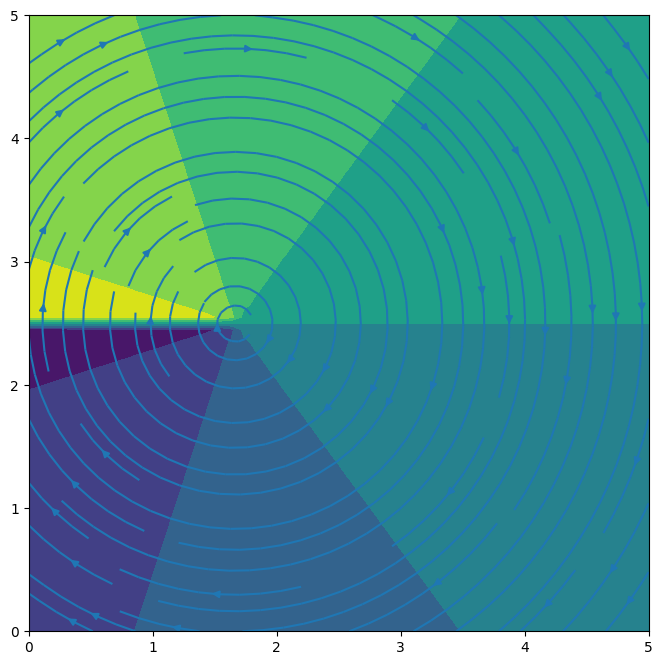

In [ ]:
# Plots for a free vortex
fig = plt.figure(figsize=(size,size))
C0 = -1.0
uvor,vvor = vel_vortex(xx,yy,C0,xloc,yloc)
phi_vortexplot = phi_vortex(xx,yy,Q0,xloc,yloc)
psi_vortexplot = psi_vortex(xx,yy,Q0,xloc,yloc)

p = plt.streamplot(xx,yy,uvor,vvor)


p = plt.contourf(xx,yy,phi_vortexplot)

## 2. Freestream plus a source

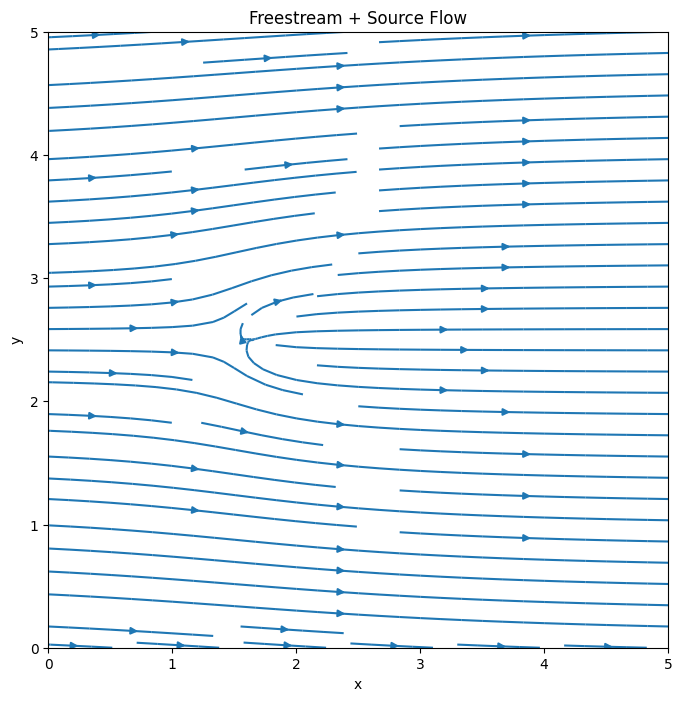

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up a "grid for plotting"
xmin = 0.
xmax = 5.
ymin = 0.
ymax = 5.
nx = 50
ny = 50
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xx, yy = np.meshgrid(x, y)

size = 8

def uniform_flow(xx, yy, U0, alpha):
    u = U0 * np.cos(alpha) * np.ones_like(xx)
    v = U0 * np.sin(alpha) * np.ones_like(yy)
    return u, v

def vel_source(xx, yy, Q0, xloc, yloc):
    x2y2 = (xx - xloc) ** 2 + (yy - yloc) ** 2
    u = Q0 / (2 * np.pi) * (xx - xloc) / x2y2
    v = Q0 / (2 * np.pi) * (yy - yloc) / x2y2
    return u, v

U0 = 1.0
alpha = 0
Q0 = 1.0
xloc = xmax / 3
yloc = ymax / 2

u_unif, v_unif = uniform_flow(xx, yy, U0, alpha)
usrc, vsrc = vel_source(xx, yy, Q0, xloc, yloc)
upair = u_unif + usrc
vpair = v_unif + vsrc

fig = plt.figure(figsize=(size, size))
plt.streamplot(xx, yy, upair, vpair)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Freestream + Source Flow')
plt.show()



## 3. Freestream plus a vortex.


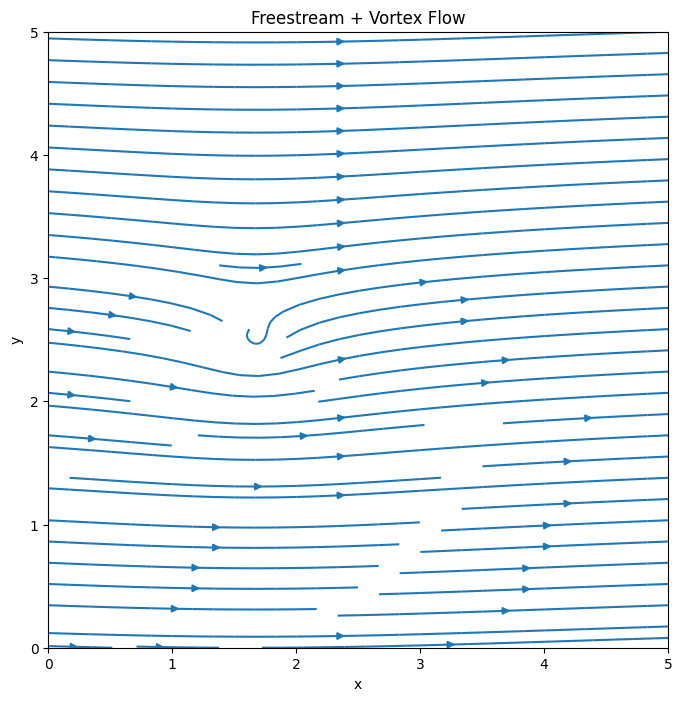

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up a grid for plotting
xmin = 0.
xmax = 5.
ymin = 0.
ymax = 5.
nx = 50
ny = 50
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xx, yy = np.meshgrid(x, y)

size = 8

# Define functions for elementary flows

# Velocity field for uniform flow
def uniform_flow(xx, yy, U0, alpha):
    u = U0 * np.cos(alpha) * np.ones_like(xx)
    v = U0 * np.sin(alpha) * np.ones_like(yy)
    return u, v

# Velocity field for a vortex
def vel_vortex(xx, yy, C0, xloc, yloc):
    x2y2 = (xx - xloc) ** 2 + (yy - yloc) ** 2
    u = -C0 / (2 * np.pi) * (yy - yloc) / x2y2
    v = C0 / (2 * np.pi) * (xx - xloc) / x2y2
    return u, v

# Set parameters
U0 = 1.0
alpha = 0  # angle of the flow to the horizontal, set to zero here
C0 = 1.0
xloc = xmax / 3
yloc = ymax / 2

# Calculate velocity field for uniform flow
u_unif, v_unif = uniform_flow(xx, yy, U0, alpha)

# Calculate velocity field for a vortex
uvor, vvor = vel_vortex(xx, yy, C0, xloc, yloc)

# Calculate total velocity field for freestream plus a vortex
upair = u_unif + uvor
vpair = v_unif + vvor

# Plot velocity vectors
fig = plt.figure(figsize=(size, size))
plt.streamplot(xx, yy, upair, vpair)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Freestream + Vortex Flow')
plt.show()


## 4. Source near a sink

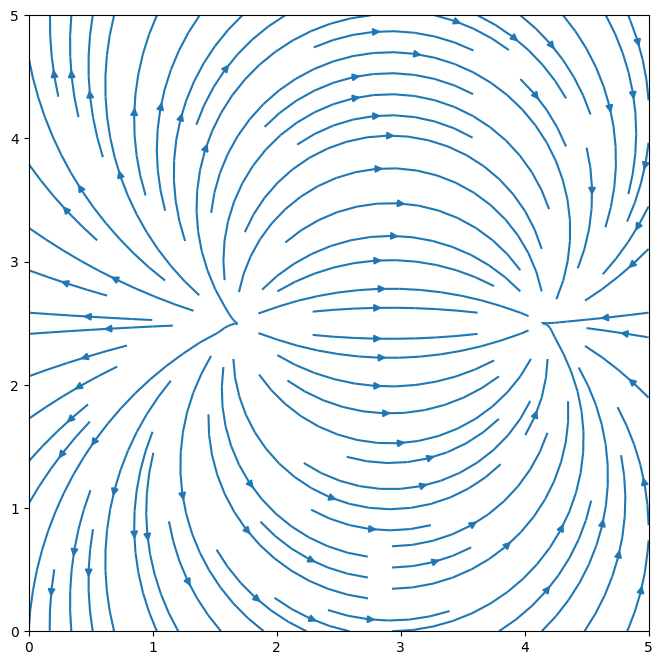

In [ ]:
fig = plt.figure(figsize=(size,size))

# Position of the sink
xsnk = xmax/3 + 0.5*xmax
ysnk = ymax/2

# Velocity field reverses the sign of the flow
usnk,vsnk = vel_source(xx,yy,-Q0,xsnk,ysnk)

# Calculate total velocity, potential, and streamfunction
upair = usrc + usnk
vpair = vsrc + vsnk
phi_sinkplot = phi_source(xx,yy,-Q0,xloc,yloc)
psi_sinkplot = psi_source(xx,yy,-Q0,xloc,yloc)
phi_pair = phi_sourceplot + phi_sinkplot
psi_pair = psi_sourceplot + psi_sinkplot

# Plot velocity vectors
p = plt.streamplot(xx,yy,upair,vpair)
#p = plt.quiver(xx,yy,upair,vpair)

# Contour plots
#p = plt.contourf(xx,yy,phi_pair) #contours of the velocity potential
#p = plt.contourf(xx,yy,psi_pair) #contours of the streamfunction

## 5. A source near another source.


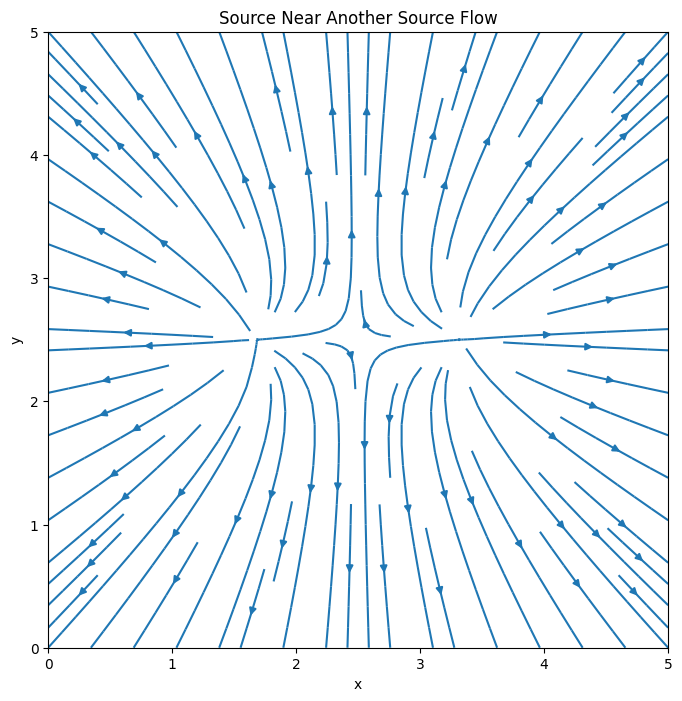

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up a grid for plotting
xmin = 0.
xmax = 5.
ymin = 0.
ymax = 5.
nx = 50
ny = 50
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xx, yy = np.meshgrid(x, y)

size = 8

# Define functions for elementary flows

# Velocity field for point source
def vel_source(xx, yy, Q0, xloc, yloc):
    x2y2 = (xx - xloc) ** 2 + (yy - yloc) ** 2
    u = Q0 / (2 * np.pi) * (xx - xloc) / x2y2
    v = Q0 / (2 * np.pi) * (yy - yloc) / x2y2
    return u, v

# Set parameters
Q0 = 1.0
xloc1, yloc1 = xmax / 3, ymax / 2
xloc2, yloc2 = 2 * xmax / 3, ymax / 2

# Calculate velocity field for the first source
u_src1, v_src1 = vel_source(xx, yy, Q0, xloc1, yloc1)

# Calculate velocity field for the second source
u_src2, v_src2 = vel_source(xx, yy, Q0, xloc2, yloc2)

# Calculate total velocity field for two sources
u_total = u_src1 + u_src2
v_total = v_src1 + v_src2

# Plot velocity vectors
fig = plt.figure(figsize=(size, size))
plt.streamplot(xx, yy, u_total, v_total)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Source Near Another Source Flow')
plt.show()


## 6. A vortex near another vortex.


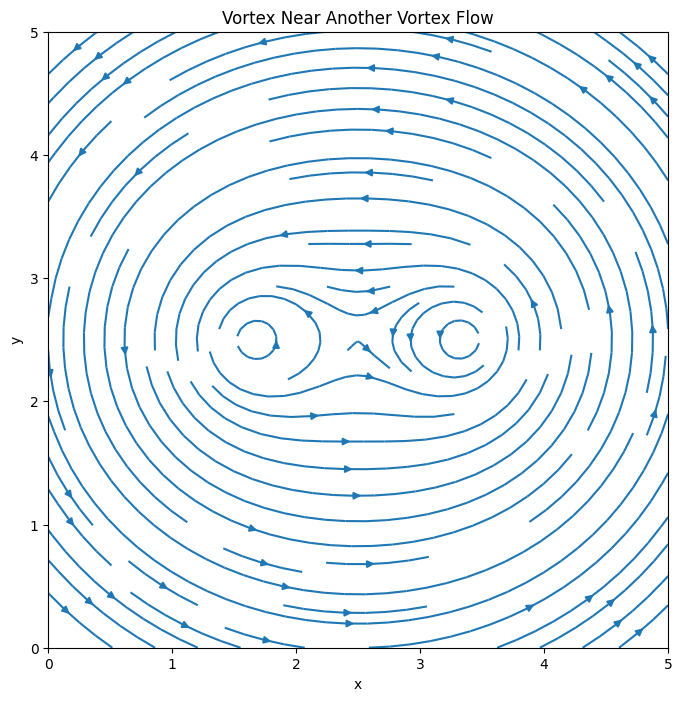

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set up a grid for plotting
xmin = 0.
xmax = 5.
ymin = 0.
ymax = 5.
nx = 50
ny = 50
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xx, yy = np.meshgrid(x, y)

size = 8

def vel_vortex(xx, yy, C0, xloc, yloc):
    x2y2 = (xx - xloc) ** 2 + (yy - yloc) ** 2
    u = -C0 / (2 * np.pi) * (yy - yloc) / x2y2
    v = C0 / (2 * np.pi) * (xx - xloc) / x2y2
    return u, v

C0 = 1.0
xloc1, yloc1 = xmax / 3, ymax / 2
xloc2, yloc2 = 2 * xmax / 3, ymax / 2
u_vor1, v_vor1 = vel_vortex(xx, yy, C0, xloc1, yloc1)
u_vor2, v_vor2 = vel_vortex(xx, yy, C0, xloc2, yloc2)
u_total = u_vor1 + u_vor2
v_total = v_vor1 + v_vor2

fig = plt.figure(figsize=(size, size))
plt.streamplot(xx, yy, u_total, v_total)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vortex Near Another Vortex Flow')
plt.show()


## 7. A vortex near another vortex of opposite sign.

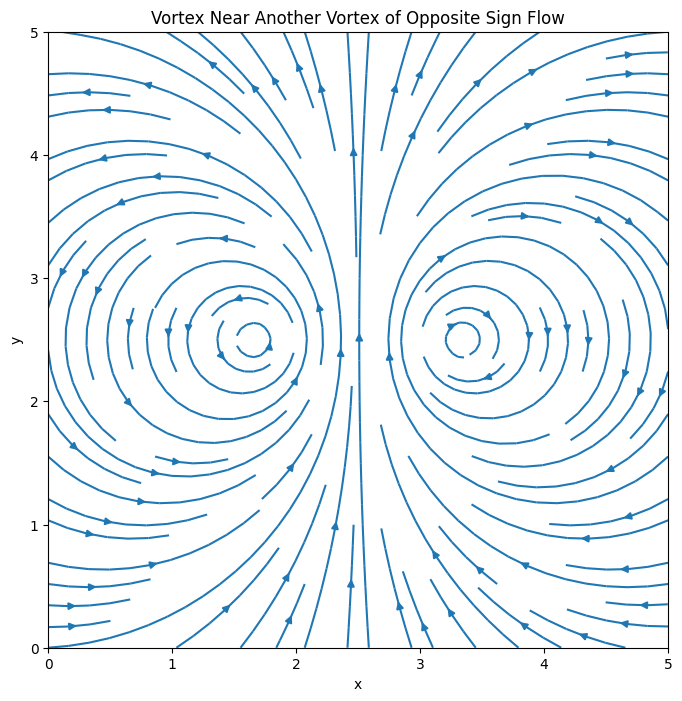

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0.
xmax = 5.
ymin = 0.
ymax = 5.
nx = 50
ny = 50
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
xx, yy = np.meshgrid(x, y)

size = 8

def vel_vortex(xx, yy, C0, xloc, yloc):
    x2y2 = (xx - xloc) ** 2 + (yy - yloc) ** 2
    u = -C0 / (2 * np.pi) * (yy - yloc) / x2y2
    v = C0 / (2 * np.pi) * (xx - xloc) / x2y2
    return u, v

C0 = 1.0
xloc1, yloc1 = xmax / 3, ymax / 2
xloc2, yloc2 = 2 * xmax / 3, ymax / 2

u_vor1, v_vor1 = vel_vortex(xx, yy, C0, xloc1, yloc1)
u_vor2, v_vor2 = vel_vortex(xx, yy, -C0, xloc2, yloc2)

u_total = u_vor1 + u_vor2
v_total = v_vor1 + v_vor2

fig = plt.figure(figsize=(size, size))
plt.streamplot(xx, yy, u_total, v_total)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vortex Near Another Vortex of Opposite Sign Flow')
plt.show()
